# Customers  Segmentation for SuperStore 

In [ ]:
##load data##

In [1]:
import pandas as pd

# Load the dataset and assign it to superstore_data
superstore_data = pd.read_csv(r'C:\Users\46729\Documents\Data Sience\01-customer segmentation\superstore_data.csv')

# View the first few rows
print(superstore_data.head())

# Overview of columns and data types
print(superstore_data.info())


      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  ...  MntFishProducts  MntSweetProducts  \
0   6/16/2014        0       189  ...              111               189   
1   6/15/2014        0       464  ...                7                 0   
2   5/13/2014        0       134  ...               15                 2   
3   11/5/2014        0        10  ...                0                 0   
4    8/4/2014        0         6  ...               11                 0   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurch

In [2]:
pd.read_csv('C:/Users/46729/Documents/Data Sience/01-customer segmentation/superstore_data.csv')


,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


Data Cleaning Steps:Handling Missing Values:

In [3]:
# Check columns with missing data before filling
print("Missing values before filling:\n", superstore_data.isnull().sum())

# Fill missing values in the 'Income' column with the median value
superstore_data['Income'].fillna(superstore_data['Income'].median(), inplace=True)

# Check columns with missing data after filling
print("Missing values after filling:\n", superstore_data.isnull().sum())




Missing values before filling:
 Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64
Missing values after filling:
 Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
Mn

In [4]:
# Print data type of Dt_Customer before conversion
print("Data type of Dt_Customer before conversion:", superstore_data['Dt_Customer'].dtype)

# Convert Dt_Customer to datetime format
superstore_data['Dt_Customer'] = pd.to_datetime(superstore_data['Dt_Customer'])

# Print data type of Dt_Customer after conversion
print("Data type of Dt_Customer after conversion:", superstore_data['Dt_Customer'].dtype)

# Optional: Print first few rows to confirm the change
print(superstore_data[['Dt_Customer']].head())


Data type of Dt_Customer before conversion: object
Data type of Dt_Customer after conversion: datetime64[ns]
  Dt_Customer
0  2014-06-16
1  2014-06-15
2  2014-05-13
3  2014-11-05
4  2014-08-04


In [12]:
# Checking unique values in categorical columns before standardization
print("Unique values in Education before standardization:", superstore_data['Education'].unique())
print("Unique values in Marital_Status before standardization:", superstore_data['Marital_Status'].unique())

# Standardizing letter case in categorical columns
superstore_data['Education'] = superstore_data['Education'].str.title()
superstore_data['Marital_Status'] = superstore_data['Marital_Status'].str.capitalize()

# Checking unique values after standardization
print("Unique values in Education after standardization:", superstore_data['Education'].unique())
print("Unique values in Marital_Status after standardization:", superstore_data['Marital_Status'].unique())


Unique values in Education before standardization: ['Graduation' 'Phd' '2N Cycle' 'Master' 'Basic']
Unique values in Marital_Status before standardization: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Yolo' 'Alone' 'Absurd']
Unique values in Education after standardization: ['Graduation' 'Phd' '2N Cycle' 'Master' 'Basic']
Unique values in Marital_Status after standardization: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'Yolo' 'Alone' 'Absurd']


In [13]:
# Print columns before dropping the 'Id' column
print("Columns before dropping 'Id':", superstore_data.columns)

# Drop the 'Id' column if it's unnecessary
superstore_data.drop(columns=['Id'], inplace=True)

# Print columns after dropping the 'Id' column
print("Columns after dropping 'Id':", superstore_data.columns)


Columns before dropping 'Id': Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')


KeyError: "['Id'] not found in axis"

In [6]:
# Save the cleaned data
superstore_data.to_csv('cleaned_superstore_data.csv', index=False)
print("Cleaned data saved successfully.")

Cleaned data saved successfully.


In [7]:
superstore_data = pd.read_csv("C:\\Users\\46729\\Documents\\Data Sience\\01-customer segmentation\\cleaned_superstore_data.csv")


In [ ]:
# بررسی وجود داده‌های گمشده پس از پاکسازی
print(superstore_data.isnull().sum())


In [ ]:
print("Unique values in Education:", superstore_data['Education'].unique())
print("Unique values in Marital_Status:", superstore_data['Marital_Status'].unique())


In [ ]:
# Export cleaned data to specified path
superstore_data.to_csv(r'C:/Users/46729/Documents/Data Sience/01-customer segmentation/cleaned_superstore_data.csv', index=False)


In [ ]:
EDA Steps : 

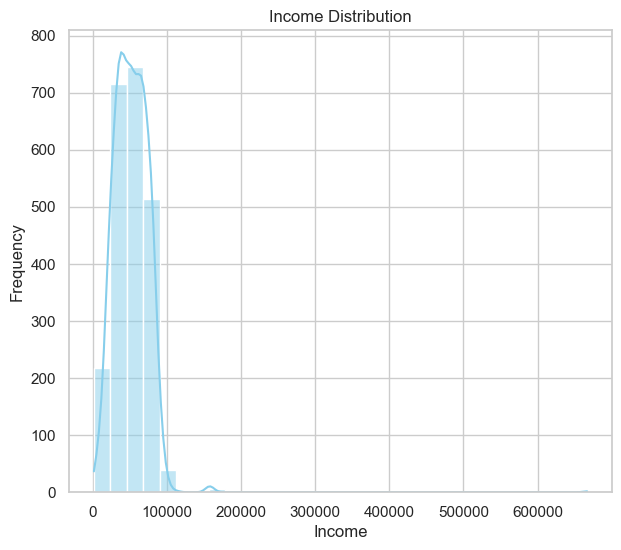

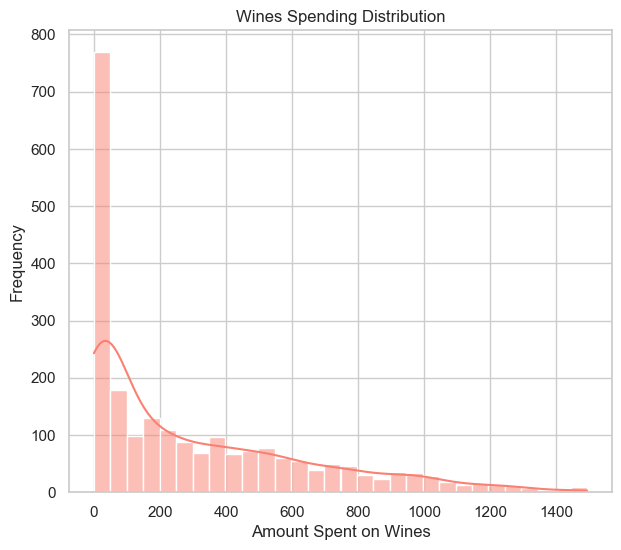

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
superstore_data = pd.read_csv('C:/Users/46729/Documents/Data Sience/01-customer segmentation/cleaned_superstore_data.csv')

# Setting up the visual style
sns.set(style="whitegrid")

# Distribution of Income
plt.figure(figsize=(7, 6))
sns.histplot(superstore_data['Income'], kde=True, bins=30, color='skyblue')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

# Distribution of MntWines (spending on wines)
plt.figure(figsize=(7, 6))
sns.histplot(superstore_data['MntWines'], kde=True, bins=30, color='salmon')
plt.title("Wines Spending Distribution")
plt.xlabel("Amount Spent on Wines")
plt.ylabel("Frequency")
plt.show()


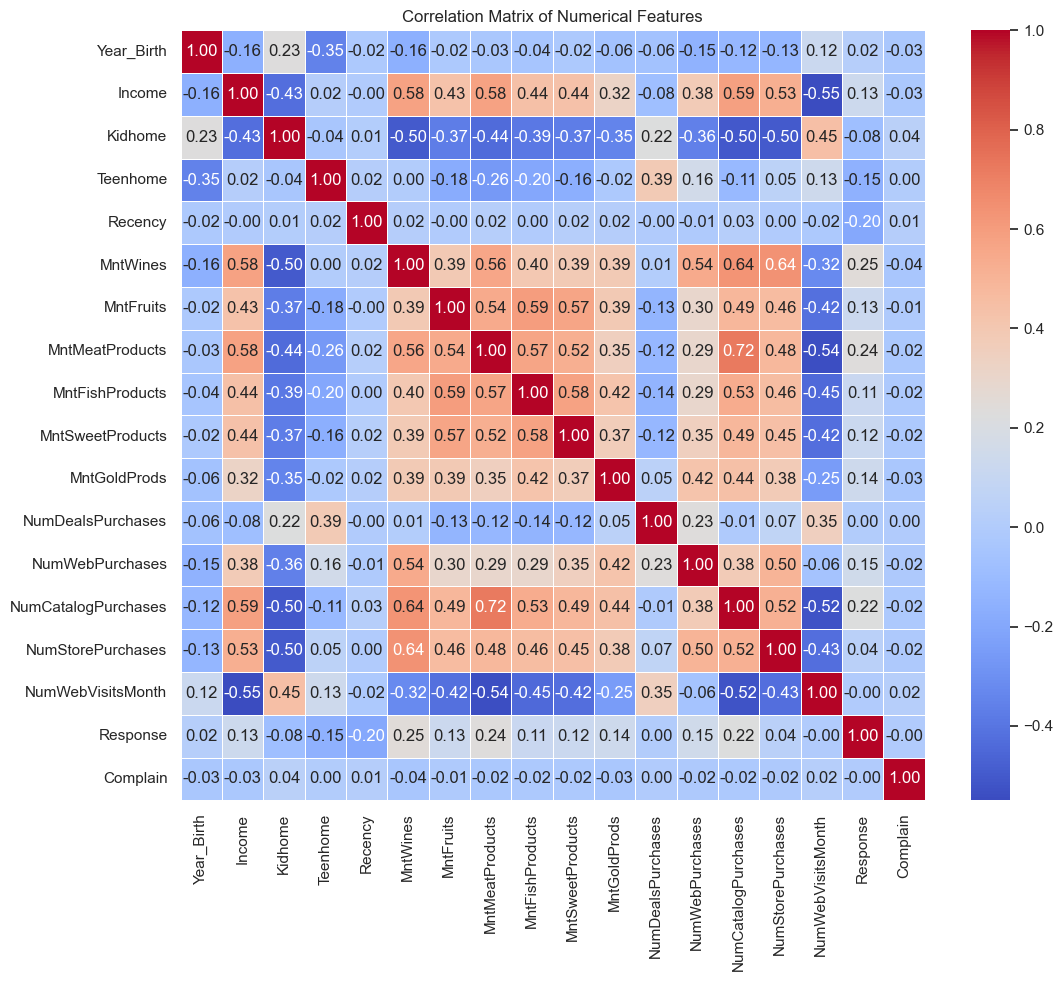

In [15]:
# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = superstore_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


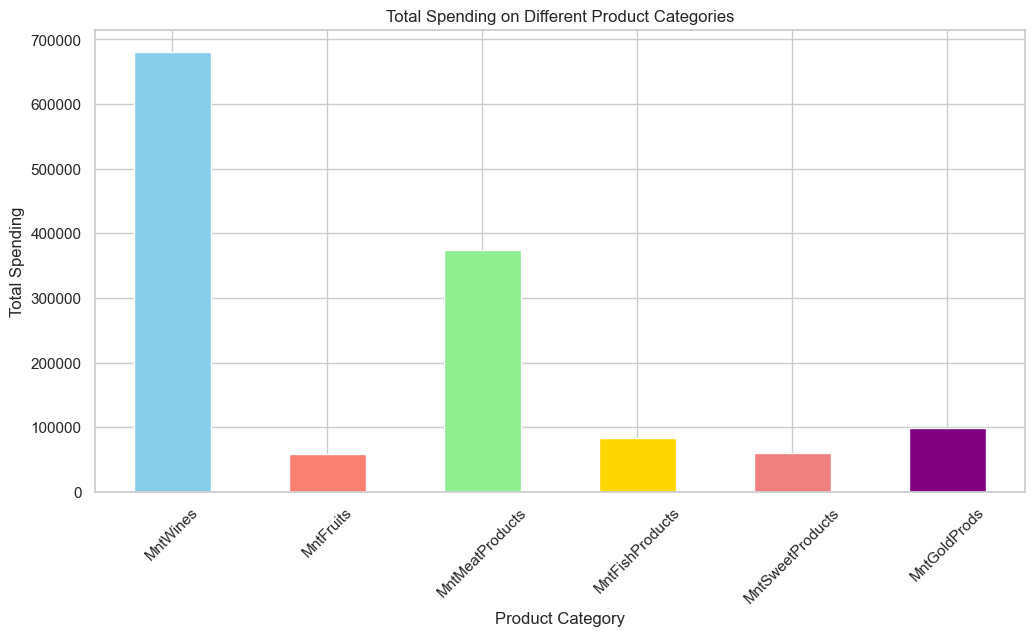

In [16]:
# Total spending across product categories
plt.figure(figsize=(12, 6))
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
superstore_data[spending_columns].sum().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'purple'])
plt.title("Total Spending on Different Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Spending")
plt.xticks(rotation=45)
plt.show()
